# Pandas Exercises
source: https://www.machinelearningplus.com/python/101-pandas-exercises-python/

---

#### 1. How to import pandas and check the version?

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'1.3.4'

In [3]:
pd.show_versions(as_json=False)   # Provide useful information, important for bug reports.


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.7.1.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.3.4
numpy            : 1.21.5
pytz             : 2018.7
dateutil         : 2.7.5
pip              : 18.1
setuptools       : 46.1.3
Cython           : 0.29.2
pytest           : 4.0.2
hypothesis       : None
sphinx           : 1.8.2
blosc            : None
feather          : None
xlsxwriter       : 1.1.2
lxml.etree       : 4.2.5
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10
IPython          : 7.2.0
pandas_datareader: None
bs4              : 4.6.3
bottleneck       : 1.2.1
fsspec           : No

#### 2. How to create a series from a list, numpy array and dict?

In [10]:
import numpy as np
mylist = list('abcdefghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [15]:
# pd.Series(): creates one-dimensional ndarray with axis labels
ser1 = pd.Series(mylist)
ser1.head(3)

0    a
1    b
2    c
dtype: object

In [16]:
ser2 = pd.Series(myarr)
ser2.head(3)

0    0
1    1
2    2
dtype: int32

In [17]:
ser3 = pd.Series(mydict)   # puts keys (=mylist) as index and values (=myarr) as values
ser3.head(3)

a    0
b    1
c    2
dtype: int32

#### 3. How to convert the index of a series into a column of a dataframe?

In [32]:
df = ser3.reset_index()  # convert index into column > automatically makes a dataframe
df.head(3)

,index,0
0,a,0
1,b,1
2,c,2


In [38]:
df2 = ser3.to_frame().reset_index()
df.equals(df2)

True

In [31]:
ser3.to_frame().head(3)  # only convert series to dataframe (and keeps the index as an index)

,0
a,0
b,1
c,2


#### 4. How to combine many series to form a dataframe?

In [49]:
# solution 1:
df = pd.concat([ser1, ser2], axis=1)
df.head(3)

,0,1
0,a,0
1,b,1
2,c,2


In [50]:
# solution 2:
df = pd.DataFrame({'col1': ser1, 'col2': ser2})
df.head(3)

,col1,col2
0,a,0
1,b,1
2,c,2


#### 5a. How to assign name to the series?

In [59]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser.name = 'alphabets'
ser.head(3)

0    a
1    b
2    c
Name: alphabets, dtype: object

#### 5b. How to assign name to the series’ index?

In [62]:
ser.index.name = 'idx'
ser.head(3)

idx
0    a
1    b
2    c
Name: alphabets, dtype: object

#### 6. How to get the items of series A not present in series B?

In [70]:
# From ser1 remove items present in ser2.
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])
ser1[~ser1.isin(ser2)]

0    1
1    2
2    3
dtype: int64

In [71]:
ser1.isin(ser2)   # Whether elements in Series are contained in `values`.

0    False
1    False
2    False
3     True
4     True
dtype: bool

#### 7. How to get the items not common to both series A and series B?

In [112]:
# Get all items of ser1 and ser2 not common to both. 
# KC solution:
ser12 = pd.concat([ser1, ser2])
ser12[~ser12.isin(ser1) + ~ser12.isin(ser2)] # all items that are not in ser1 (but ser2) and not in ser2 (but ser1)

0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64

In [96]:
# alternative solution with NumPy:
ser_u = pd.Series(np.union1d(ser1, ser2))       # union (4-5)
ser_i = pd.Series(np.intersect1d(ser1, ser2))   # intersect (1-8) 

ser_u[~ser_u.isin(ser_i)]

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

In [94]:
np.union1d(ser1, ser2)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [95]:
np.intersect1d(ser1, ser2)

array([4, 5], dtype=int64)

#### 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

In [135]:
state = np.random.RandomState(100)
ser = pd.Series(np.random.normal(10, 5, 25))

np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 0.47007443,  7.25866004,  9.41580208, 13.38174096, 24.50544687])

In [136]:
ser.describe()[3:]

min     0.470074
25%     7.258660
50%     9.415802
75%    13.381741
max    24.505447
dtype: float64

#### 9. How to get frequency counts of unique items of a series?

In [165]:
# Calculte the frequency counts of each unique value in ser.
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
ser.value_counts()

d    8
g    7
a    5
h    3
b    2
f    2
e    2
c    1
dtype: int64

In [166]:
np.take(a=['a','b','c'], indices=np.random.randint(3, size=5)) # take elements from an array a along an axis 

array(['b', 'b', 'c', 'a', 'a'], dtype='<U1')

#### 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

In [193]:
# From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.
np.random.seed(42) #RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
ser

0     3
1     4
2     1
3     3
4     3
5     4
6     1
7     1
8     3
9     2
10    3
11    3
dtype: int32

In [191]:
# top 2 most frequent values
ser.value_counts()[:2].index

Int64Index([3, 1], dtype='int64')

In [192]:
ser[~ser.isin(ser.value_counts()[:2].index)] = 'Other'
ser

0         3
1     Other
2         1
3         3
4         3
5     Other
6         1
7         1
8         3
9     Other
10        3
11        3
dtype: object

#### 11. How to bin a numeric series to 10 groups of equal size?

In [203]:
# Bin the series ser into 10 equal deciles and replace the values with the bin name.
ser = pd.Series(np.random.random(20))
pd.qcut(ser, q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.],     # Quantile-based discretization function.
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']).head()

0    2nd
1    5th
2    1st
3    9th
4    4th
dtype: category
Categories (10, object): ['1st' < '2nd' < '3rd' < '4th' ... '7th' < '8th' < '9th' < '10th']

In [212]:
[str(n) + 'th' for n in list(range(4,11))]

['4th', '5th', '6th', '7th', '8th', '9th', '10th']

#### 12. How to convert a numpy array to a dataframe of given shape?

In [7]:
# Reshape the series ser into a dataframe with 7 rows and 5 columns.
ser = pd.Series(np.random.randint(1, 10, 35))
df = pd.DataFrame(ser.values.reshape(7,5))
df

,0,1,2,3,4
0,2,5,5,4,2
1,8,3,7,2,8
2,3,8,7,6,1
3,2,5,4,2,2
4,9,4,6,4,2
5,1,8,2,6,9
6,5,2,6,8,7


#### 13. How to find the positions of numbers that are multiples of 3 from a series?

In [22]:
ser = pd.Series(np.random.randint(1, 10, 7))
np.argwhere((ser % 3 == 0).values)  # Find the indices of array elements that are non-zero, grouped by element.
# np.argwhere(ser % 3 == 0)         # gives ValueError: Length of values (1) does not match length of index (7)

array([[6]], dtype=int64)

In [34]:
# CAVE: np.argwhere() does NOT work with series as input, only with series.values as input 
a = ser % 3 == 0    # is a pd.Series (pandas.core.series.Series)
av = a.values       # is a np.ndarray (numpy.ndarray)
a, av

(0    False
 1    False
 2    False
 3    False
 4    False
 5    False
 6     True
 dtype: bool, array([False, False, False, False, False, False,  True]))

#### 14. How to extract items at given positions from a series?

In [43]:
ser.loc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [44]:
# From ser, extract the items at positions in list pos.
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

print(ser[pos])        # normal indexing
print(ser.iloc[pos])   # location-based (positional) indexing with iloc
print(ser.loc[pos])    # label-based indexing with loc
print(ser.take(pos))   # Return the elements in the given *positional* indices along an axis.
# see for differences between iloc[] and take(): 
# https://stackoverflow.com/questions/62252662/what-is-the-difference-between-pandas-df-take-and-df-iloc

0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object


#### 15. How to stack two series vertically and horizontally ?

In [52]:
# Stack ser1 and ser2 vertically and horizontally (to form a dataframe). 
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [51]:
# stack vertically > forms a longer series
pd.concat([ser1, ser2], axis=0)    # option 1: with pd.concat()
ser1.append(ser2)                  # option 2: with series.append()

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

In [53]:
pd.concat([ser1, ser2], axis=1)   # stack horizontally > forms a dataframe

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


#### 16. How to get the positions of items of series A in another series B?

In [54]:
# Get the positions of items of ser2 in ser1 as a list.
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

In [92]:
# solution 1
[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [93]:
# solution 2
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

In [76]:
# solution 3 > but not sorted as in ser 2
np.argwhere((ser1.isin(ser2)).values).flatten().tolist()

[0, 4, 5, 8]

In [61]:
(ser1.isin(ser2)).values

array([ True, False, False, False,  True,  True, False, False,  True])

#### 17. How to compute the mean squared error on a truth and predicted series?

In [94]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [102]:
np.mean(np.square(truth - pred))

0.41251362227897237

In [103]:
np.mean((truth - pred)**2)

0.41251362227897237

#### 18. How to convert the first character of each element in a series to uppercase?

In [129]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
ser

0     how
1      to
2    kick
3    ass?
dtype: object

In [141]:
# KC solution 1:
ser.str.capitalize()

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [143]:
# KC solution 2a:
ser.apply(str.capitalize)

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [145]:
# KC solution 2b:
def my_func(x):
    return x.capitalize()

ser.apply(my_func)   # apply does not work with input "capitalize" directly, only with str.capitalize (see above)

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [147]:
# KC solution 3:
pd.Series([i.capitalize() for i in ser])
pd.Series([i.title() for i in ser])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [149]:
# other solution 1:
ser.map(lambda x: x.title())

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [151]:
# other solution 2:
ser.map(lambda x: x[0].upper() + x[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [153]:
# note: all solutions above are not INPLACE, hence ser is not changed
ser

0     how
1      to
2    kick
3    ass?
dtype: object

#### 19. How to calculate the number of characters in each word in a series?

In [155]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [156]:
# solution 1: with list comprehension
[len(i) for i in ser]

[3, 2, 4, 4]

In [157]:
# solution 2: with apply
ser.apply(len)

0    3
1    2
2    4
3    4
dtype: int64

In [161]:
# solution 3a: with map
ser.map(len)

0    3
1    2
2    4
3    4
dtype: int64

In [162]:
# solution 3b: with map
ser.map(lambda x: len(x))

0    3
1    2
2    4
3    4
dtype: int64

#### 20. How to compute difference of differences between consequtive numbers of a series?

In [169]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

In [170]:
# differences
ser.diff().tolist()

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]

In [171]:
# differences of differences
ser.diff().diff().tolist()

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

#### 21. How to convert a series of date-strings to a timeseries?

In [172]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object

In [184]:
# solution 1: better
pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [183]:
# solution 2:
from dateutil.parser import parse    # Parse a timestring in one of the supported formats
ser.map(lambda x: parse(x))

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

#### 22. How to get the day of month, week number, day of year and day of week from a series of date strings?

In [185]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object

In [210]:
# day of month
ser_ts = pd.to_datetime(ser)
ser_ts.dt.day.tolist()          # or: [x.day for x in ser_ts]

[1, 2, 3, 4, 5, 6]

In [218]:
# week number: with .week or .weekofyear
ser_ts.dt.week.tolist()         # or: [x.week for x in ser_ts]

[53, 5, 9, 14, 19, 23]

In [212]:
# day num of year: with .dayofyear or .day_of_year
ser_ts.dt.dayofyear.tolist()    # or: [x.dayofyear for x in ser_ts] 

[1, 33, 63, 94, 125, 157]

In [223]:
# day of week: with .day_name
ser_ts.dt.day_name().tolist()   # or: [x.day_name() for x in ser_ts]

['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']

#### 23. How to convert year-month string to dates corresponding to the 4th day of the month?

In [243]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])
ser

0    Jan 2010
1    Feb 2011
2    Mar 2012
dtype: object

In [259]:
# solution 1:
ser.map(lambda x: parse('04 ' + x))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [244]:
# solution 2: see https://stackoverflow.com/questions/28888730/pandas-change-day
ser_ts = pd.to_datetime(ser)   # or ser.map(lambda x: parse(x))
ser_ts.apply(lambda x: x.replace(day=4))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [260]:
# solution 3: 
# Construct date string by hand with date as 4
ser_datestr = ser_ts.dt.year.astype('str') + '-' + ser_ts.dt.month.astype('str') + '-' + '04'
# Format it.
[parse(i).strftime('%Y-%m-%d') for i in ser_datestr]

['2010-01-04', '2011-02-04', '2012-03-04']

#### 24. How to filter words that contain atleast 2 vowels from a series?

In [264]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])
ser.map(lambda x: 'aeiou' in x)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [275]:
# solution 1: see https://stackoverflow.com/questions/49234374/
mask = ser.str.lower().str.count(r'[aeiou]') >= 2
ser[mask]

0     Apple
1    Orange
4     Money
dtype: object

In [281]:
# solution 2:
from collections import Counter
mask = ser.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in list('aeiou')]) >= 2)
ser[mask]

0     Apple
1    Orange
4     Money
dtype: object

In [276]:
[i for i in list('aeiou')]

['a', 'e', 'i', 'o', 'u']

In [282]:
[Counter('apple').get(i, 0) for i in list('aeiou')]  # Counter.get > Return the value for key if key is in dict

[1, 1, 0, 0, 0]

In [283]:
sum([Counter('apple').get(i, 0) for i in list('aeiou')])

2

#### 25. How to filter valid emails from a series?

In [2]:
# The regex pattern for valid emails is provided as reference.
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

In [13]:
# Solution 1a (as series of strings) - with str.match()
mask = emails.str.match(pattern)
emails[mask]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [12]:
# Solution 1b (as series of strings) - with re.match(pattern, string)
# tries to apply the pattern at the start of the string, returning a Match object, or None if no match was found.

import re
mask = emails.map(lambda x: bool(re.match(pattern, x)))   # input: (pattern, string), output: Match object
emails[mask]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [18]:
# Cave: re.match() returns a Match object, not a Boolean
re.match('hi','hiho'), bool(re.match('hi','hiho'))

(<re.Match object; span=(0, 2), match='hi'>, True)

In [22]:
# Solution 2 (as series of list)
# str.finall(): finds all occurrences of pattern or regular expression in the Series/Index.
emails.str.findall(pat=pattern, flags=re.IGNORECASE)

0                     []
1    [rameses@egypt.com]
2            [matt@t.co]
3    [narendra@modi.com]
dtype: object

In [29]:
# Solution 3 (as list)
[x[0] for x in [re.findall(pattern, email) for email in emails] if len(x) > 0]

['rameses@egypt.com', 'matt@t.co', 'narendra@modi.com']

In [30]:
# inner list comprehension: > then take first element of each non-empty list to make the final list
[re.findall(pattern, email) for email in emails]

[[], ['rameses@egypt.com'], ['matt@t.co'], ['narendra@modi.com']]

#### 26. How to get the mean of a series grouped by another series?

In [43]:
# Compute the mean of weights of each fruit.
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))

print(fruit.tolist())
print(weights.tolist())

['apple', 'carrot', 'banana', 'apple', 'carrot', 'carrot', 'apple', 'carrot', 'apple', 'banana']
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [44]:
weights.groupby(fruit).mean()

apple     5.25
banana    6.50
carrot    5.25
dtype: float64

In [46]:
[weights[fruit=='apple'].mean(),
weights[fruit=='banana'].mean(),
weights[fruit=='carrot'].mean()]

[5.25, 6.5, 5.25]

#### 27. How to compute the euclidean distance between two series?

In [54]:
# Compute the euclidean distance between series (points) p and q, without using a packaged formula.
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])


18.16590212458495

In [61]:
# Solution without using NumPy's sqrt():
sum((p - q)**2)**.5

18.16590212458495

In [62]:
# Solution using NumPy's sqrt():
np.sqrt(sum((p - q)**2))

18.16590212458495

In [66]:
# Solution using NumPy's norm():
np.linalg.norm(p-q, ord=None)      # Matrix or vector norm, returns L2 norm if ord=None (default) or ord=2

18.16590212458495

#### 28. How to find all the local maxima (or peaks) in a numeric series?

In [78]:
# Get the positions of peaks (values surrounded by smaller values on both sides) in ser.
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [98]:
# Solution 1:
dd = np.diff(np.sign(np.diff(ser)))    # dd has -2 if numbers on both sides smaller, i.e. if d=([1, -1])
peak_locs = np.where(dd == -2)[0] + 1  # add +1 index to fetch the correct position
peak_locs

array([1, 5, 7], dtype=int64)

In [99]:
np.diff(ser), np.sign(np.diff(ser)), np.diff(np.sign(np.diff(ser)))

(array([ 8, -7,  1,  5,  1, -8,  5, -4], dtype=int64),
 array([ 1, -1,  1,  1,  1, -1,  1, -1], dtype=int64),
 array([-2,  2,  0,  0, -2,  2, -2], dtype=int64))

In [100]:
np.where(dd == -2), np.where(dd == -2)[0], np.where(dd == -2)[0] + 1

((array([0, 4, 6], dtype=int64),),
 array([0, 4, 6], dtype=int64),
 array([1, 5, 7], dtype=int64))

In [101]:
# Solution 2: see https://stackoverflow.com/questions/48023982/pandas-finding-local-max-and-min
ser[(ser.shift(1) < ser) & (ser.shift(-1) < ser)]   # shift index by desired number (one forward & one backward)

1    10
5    10
7     7
dtype: int64

In [102]:
ser[(ser.shift(1) < ser) & (ser.shift(-1) < ser)].index

Int64Index([1, 5, 7], dtype='int64')

In [103]:
ser.shift(1)

0     NaN
1     2.0
2    10.0
3     3.0
4     4.0
5     9.0
6    10.0
7     2.0
8     7.0
dtype: float64

#### 29. How to replace missing spaces in a string with the least frequent character?

In [161]:
# Replace the spaces in my_str with the least frequent character.
my_str = 'dbc deb abed gade'

In [164]:
# Solution: first geht count for each letter
ser = pd.Series(list(my_str))
freq = ser.value_counts().drop(index=' ')  # delete row with whitespace as index
freq

d    4
b    3
e    3
a    2
c    1
g    1
dtype: int64

In [173]:
# then extract the least frequent character
least_freq = freq.index[-1]  # get last index (minimum count)
least_freq

'g'

In [176]:
# then replace the whitespace in the original string with that character
my_str.replace(' ', least_freq)

'dbcgdebgabedggade'

In [177]:
# alternative for last step: replace whitespace in the pandas series, then join series elements into a string
"".join(ser.replace(' ', least_freq))

'dbcgdebgabedggade'

#### 30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?

In [186]:
pd.Series(data=np.random.randint(1,10,10), 
          index=pd.date_range("2000-01-01", periods=10, freq="W-SAT"))

2000-01-01    3
2000-01-08    5
2000-01-15    2
2000-01-22    4
2000-01-29    7
2000-02-05    5
2000-02-12    4
2000-02-19    7
2000-02-26    6
2000-03-04    4
Freq: W-SAT, dtype: int32

In [188]:
dti = pd.date_range("2000-01-01", periods=10, freq="W-SAT")
dti

DatetimeIndex(['2000-01-01', '2000-01-08', '2000-01-15', '2000-01-22',
               '2000-01-29', '2000-02-05', '2000-02-12', '2000-02-19',
               '2000-02-26', '2000-03-04'],
              dtype='datetime64[ns]', freq='W-SAT')

#### 31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?

In [192]:
ser = pd.Series([1,10,3,np.nan], 
                index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
ser

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64

In [200]:
# Solution:
ser.resample('D').pad()    # same as .ffill() = fill with previous value
ser.resample('D').ffill()  # same as .pad() 

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

In [201]:
# Alternatives:
ser.resample('D').bfill()  # fill with next value (backward fill)

2000-01-01     1.0
2000-01-02    10.0
2000-01-03    10.0
2000-01-04     3.0
2000-01-05     3.0
2000-01-06     3.0
2000-01-07     NaN
2000-01-08     NaN
Freq: D, dtype: float64

In [202]:
ser.resample('D').bfill().ffill()  # fill next else prev value

2000-01-01     1.0
2000-01-02    10.0
2000-01-03    10.0
2000-01-04     3.0
2000-01-05     3.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     3.0
Freq: D, dtype: float64

In [203]:
# Other task: only fill NaN in original timeseries:
ser.fillna(method='pad')    # same as method='ffill'

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     3.0
dtype: float64

#### 32. How to compute the autocorrelations of a numeric series?

In [255]:
# Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))
ser

0      5.093028
1    -12.167858
2     -1.959151
3     -0.962633
4      4.278274
5     14.750143
6     17.890959
7     15.505092
8      2.612650
9     11.719134
10    16.956827
11    -7.476910
12     1.476109
13    24.617322
14    33.955185
15    23.965465
16    32.126696
17    27.694454
18    20.978710
19    29.723609
dtype: float64

In [256]:
# use .autocorr() method, which computes the Pearson correlation between the Series and its shifted self.
ser.autocorr(lag=1)  # lag (default=1): number of lags to apply before performing autocorrelation

0.6399944853286706

In [257]:
# Solution:
autocorrs = [ser.autocorr(lag=i) for i in range(11)]   # use lag=0...10
autocorrs

[1.0,
 0.6399944853286706,
 0.3651967653045627,
 0.36302768804957763,
 0.2042666894319506,
 -0.01677245337412744,
 0.03882846700456044,
 0.3654271128445411,
 0.3601867957214222,
 0.6215934360057552,
 0.7863033445193117]

In [258]:
# which lag has the largest correlation > add index +1 because we drop lag=0 (which has correlation of 1.0)
lagmax = np.argmax(np.abs(autocorrs[1:])) + 1
lagmax

10

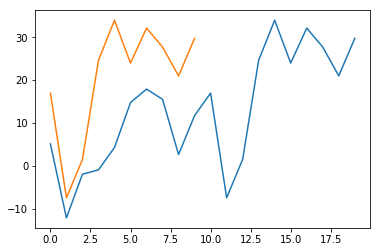

In [259]:
ser.plot();
ser[lagmax:].reset_index(drop=True).plot();

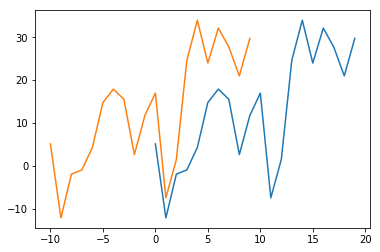

In [260]:
ser.plot();
ser.index -= lagmax
ser.plot();

#### 33. How to import only every nth row from a csv file to create a dataframe?

In [ ]:
# Import every 50th row of BostonHousing dataset as a dataframe. 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

---
#18. ser.str.title()
#19. ser.str.len()
#23. pd.to_datetime(ser) + pd.DateOffset(days=3)
#24. ser.loc[ser.str.lower().map(lambda x: len(set(x).intersection(set('aeiou'))))>1]
#25. pd.Series(emails.reindex(emails).filter(regex=pattern).index)
#28. ser.loc[(ser.diff()>0)&(ser.diff(-1)>0)].index.to_list()
#29. my_str.replace(' ', Counter(my_str.replace(' ', '')).most_common()[-1][0])
#33. pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', skiprows=lambda x: x%50!=0)
#39. df.rename(columns=dict(zip(df.columns, df.columns.str.replace('.', '_')))).rename(columns = {'Type':'CarType'})
#41. df.isnull().sum().idxmax()
#51. df['a'].sort_values(ascending=True).index[5]
#52. ser.loc[ser > ser.mean()].index[1]
#53. df.loc[df.sum(axis=1)>100].iloc[-2:]
#57. df.set_index(df.index[::-1]).sort_index()
#59. df.max(axis=1).argmax()
#63. df['penultimate'] = df.apply(lambda x: sorted(set(x))[-2], axis=1)
#66. np.fill_diagonal(df.to_numpy(), 0)